In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from tensorflow import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

# Data Preprocessing

In [144]:
train_data='fruits5/train'
test_data='fruits5/test'

def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

Y_train = np_utils.to_categorical(Y_train, 5)
Y_test = np_utils.to_categorical(Y_test, 5)

In [145]:
# split train set into train and validation set
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [146]:
# convert_image_to_array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

In [147]:
#re-scale data to make all the pixel values within 0 to 1
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

# CNN Model Building

In [148]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (2,2),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size = (2,2),activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size = (2,2),activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128,kernel_size = (2,2),activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
activation_30 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 12, 12, 64)      

# Compile Model

In [149]:
#data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)
it_gen = datagen.flow(X_train, Y_train, batch_size=256)

In [150]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

# Fitt Model

In [151]:
CNN_model = model.fit(it_gen,
        batch_size = 128,
        epochs=15,
        validation_data=(X_val, Y_val),
        callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)],
        verbose=2, shuffle=True)

Epoch 1/15
8/8 - 6s - loss: 1.5370 - accuracy: 0.3430 - val_loss: 1.0787 - val_accuracy: 0.4855
Epoch 2/15
8/8 - 6s - loss: 0.7506 - accuracy: 0.7037 - val_loss: 0.3204 - val_accuracy: 0.8071
Epoch 3/15
8/8 - 5s - loss: 0.2507 - accuracy: 0.8971 - val_loss: 0.0920 - val_accuracy: 0.9627
Epoch 4/15
8/8 - 5s - loss: 0.0920 - accuracy: 0.9693 - val_loss: 0.1044 - val_accuracy: 0.9564
Epoch 5/15
8/8 - 6s - loss: 0.0401 - accuracy: 0.9844 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/15
8/8 - 5s - loss: 0.0184 - accuracy: 0.9948 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/15
8/8 - 6s - loss: 0.0069 - accuracy: 0.9984 - val_loss: 1.5870e-04 - val_accuracy: 1.0000
Epoch 8/15
8/8 - 6s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 4.5852e-04 - val_accuracy: 1.0000
Epoch 9/15
8/8 - 6s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 8.3110e-05 - val_accuracy: 1.0000
Epoch 10/15
8/8 - 6s - loss: 0.0043 - accuracy: 0.9990 - val_loss: 1.1493e-04 - val_accuracy: 1.0000
Epoch 11/15
8/8 - 6s - 

In [141]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

26/26 [==============================] - 1s 26ms/step - loss: 6.0964e-06 - accuracy: 1.0000
Test accuracy: 1.0


# Prediction and Plots

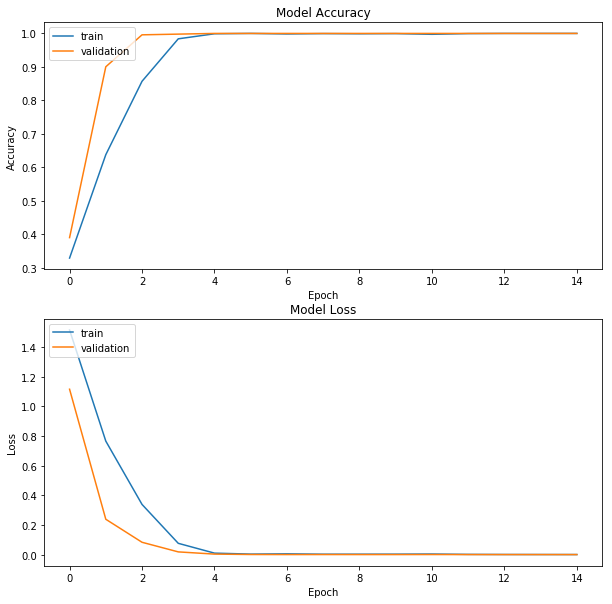

In [142]:
# plotting model accuracy 
plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['accuracy'])  
plt.plot(CNN_model.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

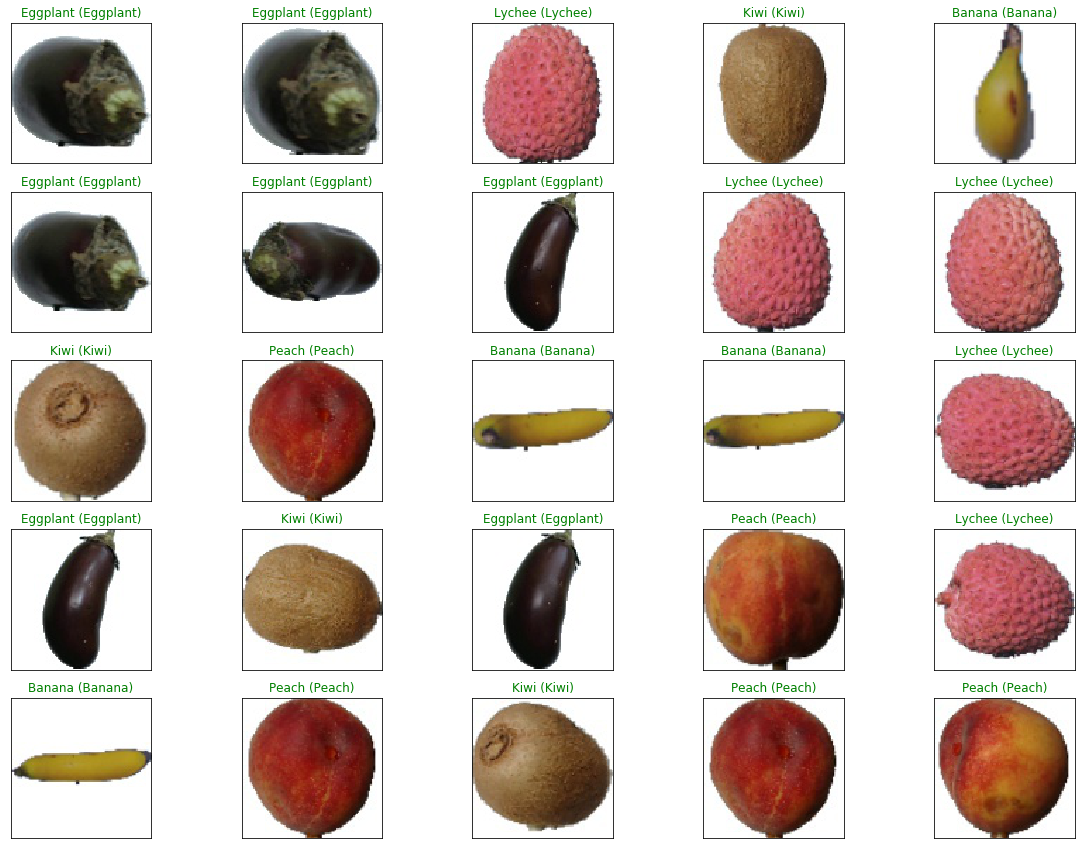

In [57]:
# predict on test data
Y_pred = model.predict(X_test)

# plot predicted data and their class
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))